# Makemore - Part 1

Like previously mentioned, Makemore makes "more" of things you provide to it. Simple as that. This Jupyter notebook, is my first step in the journey in building **Makemore**. Let's do this!

Under the hood, Andrej said, Makemore is a **character-level language model**. It means that Makemore will model sequences of characters. In order words, Makemore tries to predict the next character, based on previous characters. Another way to put this, would be to say that Makemore tries to answer the following question:

> Based on the previous characters, what character is likely to come **next**?

To provide contrast, ChatGPT is a *token-level language model*. It attempts to predict the next token (i.e. words) based on the previous tokens.

Without further talking, let's start the building with loading the dataset `names.txt`.

## Loading the dataset

In this section of the notebook, I load in the dataset contained in `names.txt` in a string, split it to get individual words, then insert them in a Python list.

In [1]:
words = open('names.txt', 'r').read().splitlines()

And we can go ahead and display the first 10 element of the list. Just to see...

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

## Exploring the dataset

We would like to learn more about this dataset, so let's go ahead and print out the total number of words in the dataset.

In [3]:
len(words)

32033

Let's print out the shortest and longuest words, in our dataset

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

Let's think through our character-level language model for a bit. Remember, its job is to predict the **next character**, given some already concrete sequence of characters before it. So, the existence of a single word in the dataset like `isabella`, Andrej said, tells us that:

- The character `i` is very likely to come first in a name 🤔

- The character `s` is likely to follow the character `i`

- The character `a` is likely to follow the sequence `is`

- The character `b` is likely to follow the sequence `isa`

- ... And so on

- There is also one last bit of information in the `isabella` word. It is that after all those letters have been predicted, the word is likely to be **finished** 🤷🏾‍♂️.

This is an example of information in terms of statistical structure of what is likely to follow that can be extracted from the character-sequence, `isabella`. And isabella is not our only example! We have 32,000 of them 😎.

So, our goal writing this program is capture the statistical structure in those 32,000 training examples.

And in this notebook, we are going to implement a **bigram** model to acheive the previously mentioned goal.

## A Bigram model

See, in a Bigram model we are only looking at **two characters at a time**. That's it, just ✌🏾. It means that given a character... we are just trying to predict the *next character* in the sequence.

The Bigram model we are set to build is concerned with modeling the "local relationship (or structure)" between pairs of characters. The downside is that *it only looks at 2 characters*. It ignores anything before the current character.

For this reason, Bigram models are simple, but weak. But Andrej said, they are a great place to start. I believe him. 🫡.

Let's continue and explore the bigrams in the dataset and see what they look like. And these Bigrams are just characters in a row.

## Exploring the Bigrams in the dataset

To print a bigram, we must iterate on each words... and print two characters at a time. A bit like a sliding window. So, let's do that with the first word in our dataset, `emma`.

In [6]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


These are the consecutive characters in the first word. But like Andrej, we have to be careful... because we have more information than those three pairs of characters.

If you remember, with our example `isabella`... the first information we got out it was that the character `i` was likely to come first, and the last information was the character `a` was likely to mark the end of the word. 

To be able to capture those two pieces of information, we can imagine that every example (i.e. names) in our dataset begins with a special "start" character (`<S>`) and ends with a special "end" character (`<E>`).

With that in mind, let's modify our little snippet of code above to reflect the change.

In [7]:
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>'] #print 'chs' to see what is it now
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


`("<S>", "e")` is a bigram of the special "start" character and the letter "e".
    
`("a", "<E>")` is a bigram of the letter "a" and the special "end" character.

But what does that mean? For the first bigram... it means that given the special "start" character, the letter that is likely to come next is "e". Whereas for the second bigram... it means that the letter "e" is likely to be the last letter in the word.

Let's print the bigram of the first three words and see what it looks like

In [8]:
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


## Counting the Bigrams in a Python Dictionary

In order to find out the statistics of which character is likely to follow another, the simple way is to count. In this section of the report, we are counting how often each of those character pairs occurs in the dataset.

For that we need a dictionary

In [9]:
count_dict = {} #bigram -> count

This dictionary maps a given bigram to a number. What is going to happen is that for each bigram we encounter, we will increment the count. Let's implement it in code:

In [10]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        count_dict[bigram] = count_dict.get(bigram, 0) + 1

Before moving forward, I would like to explain the following syntax:

```py
count_dict.get(bigram, 0) + 1

```

This syntax first tries to retreive the `count` associated with the current `bigram`. If the current bigram is not already a key, it is added... and associated the value of `0`, then increments it. In case the bigram is already a key in the dictionary, its value is simply incremented.

The same thing could be acheived using a Python `DefaultDict`. I followed Andrej's syntax on this one. Okay, let's continue.

By now, our `count_dict` should contains all of the bigrams in the dataset, but also how *often they occur*. Don't believe me? Lol, let's print out `count_dict`

In [ ]:
count_dict

Look at all those baby bigrams! Let's go one step further and order them by frequency

In [ ]:
sorted(count_dict.items(), key = lambda kv: kv[1], reverse=True)

They are now ordered by count. The bigram that occured the most is first and the one that occured the least is last. Looking at the first element of the sorted array tells that the letter `n` was very often an ending character.

## Counting Bigrams in a 2D torch tensor

According to Andrej, storing this information in a 2D tensor is going to be much more convenient than a Python dictionary. I personally do not see how for now, but let's follow through and see.

In what will follow, the **rows** are going to be the **first character in the bigram**, and the column is going to be the **second character in the bigram**. And each entry will in the 2D tensor will tell us how often the pair occurs in the dataset. Or how often the second character in the bigram follows the first.

After hearing this plan, I undertstood why he said it would be more convenient. We'll be using PyTorch for the tensor creation, and all that good stuff.

In [13]:
import torch

Let's create a ($28 \times 28$) tensor made of zeros, for the 26 letters of the alphabet and our two special tokens `<S>` and `<E>`.

In [14]:
N = torch.zeros((28, 28), dtype=torch.int32)

Whenever we encounter one bigram, we increment the proper entry. We do it with the following Python snippet.

But before that, remember that we have only been dealing with characters, and we cannot index into a tensor with characters, we need integers for that. To address this situation, Andrej suggested create a lookup table. It is dictionary that returns the index (i.e. an integer) of a given character.

In [15]:
chars = sorted(list(set(''.join(words)))) #All unique letters in the dataset
stoi = { s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [16]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        x = stoi[ch1]
        y = stoi[ch2]
        N[x, y] += 1

See? The code is shorter and cleaner. After running the previous Python cell, we can print out the tensor `N`.

In [ ]:
N

As we can see it does look really good. To address this, Andrej shared the following piece code using the matplotlib to "pretty print" the tensor.

## Visualizing N, the bigram Tensor

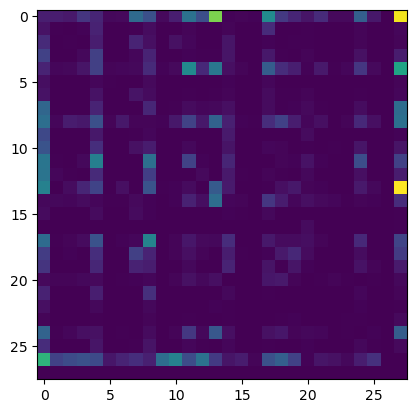

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

He went further and proposed a better way of visualizing those bigrams.

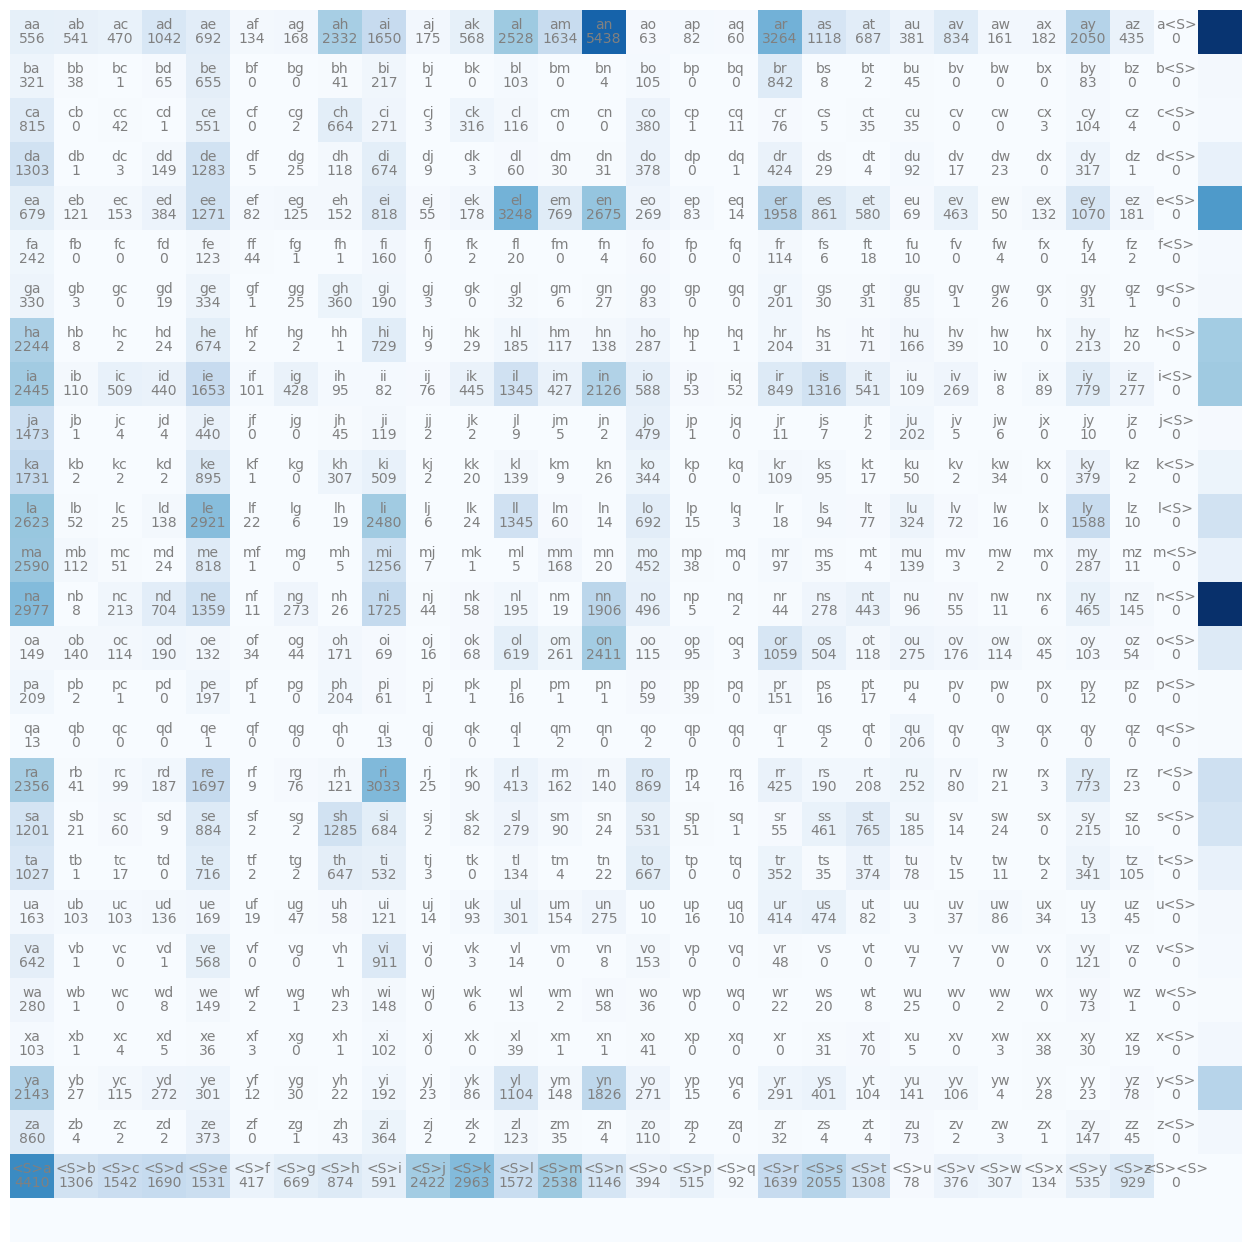

In [ ]:
itos = {i:s for s,i in stoi.items()}

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');